# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [10]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [13]:
df = pd.read_csv(r"C:\Users\Sritha\Downloads\AviationData_Cleaned.csv")
print(df.shape)
df.head()

C:\Users\Sritha\AppData\Local\Temp\ipykernel_8728\359121600.py:1: DtypeWarning: Columns (0,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Sritha\Downloads\AviationData_Cleaned.csv")


(17879, 38)


,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Broad_Phase_Of_Flight,Report_Status,Publication_Date,Total_Passengers,Serious_Fatal_Fraction,Aircraft_Damage_Clean,Destroyed,Make_Clean,Model_Clean,Plane_Type
0,20001214X42478,Incident,LAX83IA149A,1983-03-18,"LOS ANGELES, CA",United States,NaN,NaN,LAX,LOS ANGELES INTL,...,Taxi,Probable Cause,04-12-2014,588.0,0.0,minor,False,Boeing,747,Boeing 747
1,20001214X42331,Accident,ATL83FA140,1983-03-20,"CROSSVILLE, TN",United States,NaN,NaN,NaN,NaN,...,Cruise,Probable Cause,02-05-2011,2.0,1.0,destroyed,True,Piper,Pa-28-140,Piper Pa-28-140
2,20001214X42672,Accident,FTW83LA177,1983-04-02,"MCKINNEY, TX",United States,NaN,NaN,TX05,AERO COUNTRY,...,Standing,Probable Cause,17-10-2016,5.0,0.2,unknown,False,De Havilland,Dhc-6,De Havilland Dhc-6
3,20001214X45013,Incident,CHI84IA041,1983-11-08,"CHICAGO, IL",United States,NaN,NaN,ORD,O'HARE,...,Taxi,Probable Cause,11-06-2018,100.0,0.0,minor,False,Boeing,727-200,Boeing 727-200
4,20001214X45188,Accident,NYC84LA028,1983-11-13,"MARTHA'S VINEYARD, MA",United States,NaN,NaN,NaN,NaN,...,Climb,Probable Cause,05-05-2011,1.0,0.0,substantial,False,Beech,C35,Beech C35


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [16]:
#small planes with 20 or fewer passengers
small_planes = df[df['Total_Passengers'] <= 20]

#large planes with more than 20 passengers
large_planes = df[df['Total_Passengers'] > 20]

print(f"Small planes: {small_planes.shape[0]} rows")
print(f"Large planes: {large_planes.shape[0]} rows")

Small planes: 17006 rows
Large planes: 873 rows


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

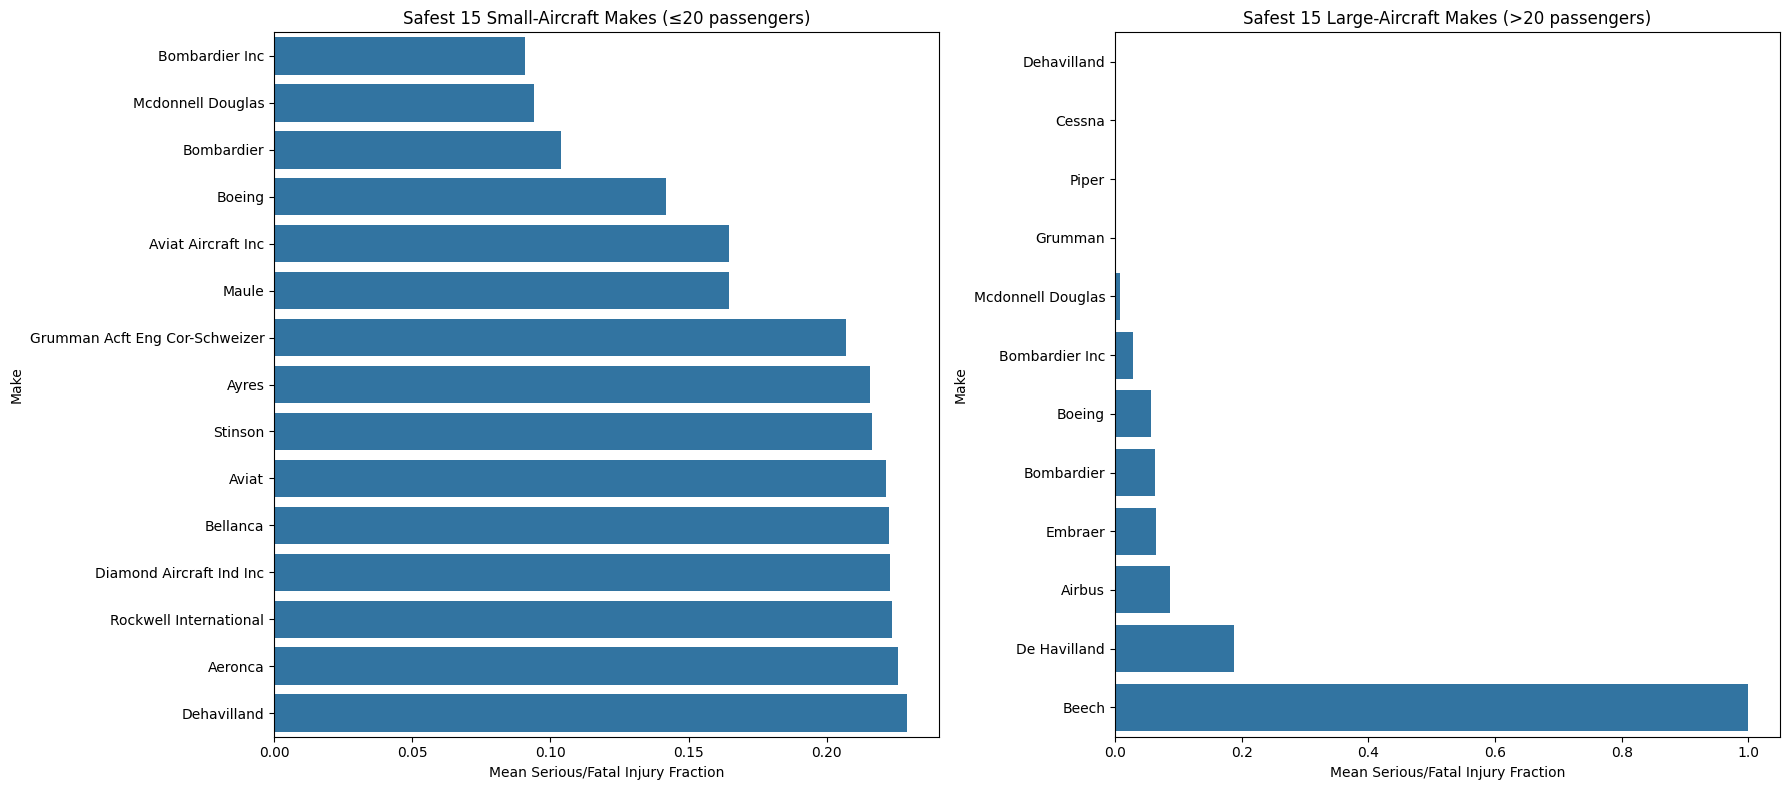

In [17]:
#calcultaing mean fatal/serious per make
small_make_risk = (small_planes.groupby('Make_Clean')['Serious_Fatal_Fraction'].mean().sort_values())
large_make_risk = (large_planes.groupby('Make_Clean')['Serious_Fatal_Fraction'].mean().sort_values())

#selecting 15 safest makes in each group
top15_small = small_make_risk.head(15)
top15_large = large_make_risk.head(15)

#plotting side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(x=top15_small.values,y=top15_small.index,ax=axes[0])
axes[0].set_title("Safest 15 Small-Aircraft Makes (≤20 passengers)")
axes[0].set_xlabel("Mean Serious/Fatal Injury Fraction")
axes[0].set_ylabel("Make")

sns.barplot(x=top15_large.values,y=top15_large.index,ax=axes[1])
axes[1].set_title("Safest 15 Large-Aircraft Makes (>20 passengers)")
axes[1].set_xlabel("Mean Serious/Fatal Injury Fraction")
axes[1].set_ylabel("Make")

plt.tight_layout()
plt.show()

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

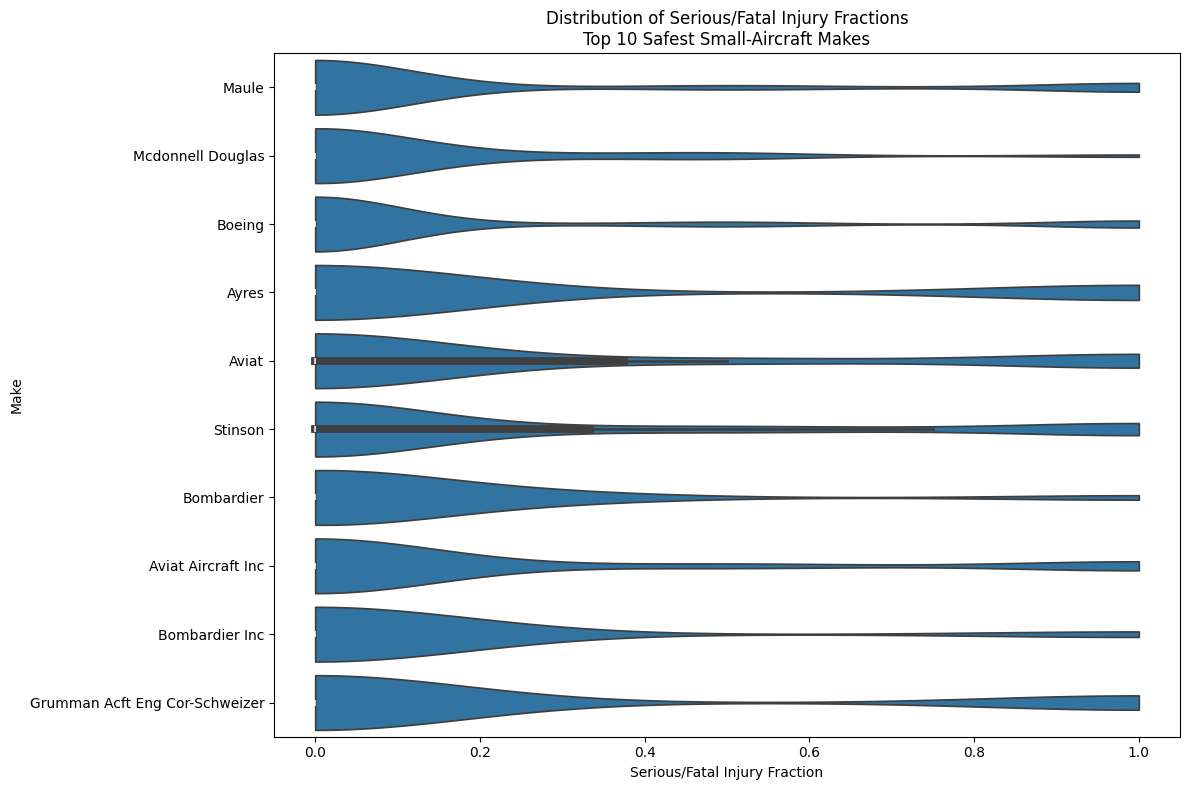

In [23]:
#filtering small planes
small_planes = df[df['Total_Passengers'] <= 20]

#finding 10 makes with lowest mean injury rate
small_make_means = (small_planes.groupby('Make_Clean')['Serious_Fatal_Fraction'].mean().sort_values())
top10_small_makes = small_make_means.head(10).index

#filtering to include only those 10 makes
small_subset = small_planes[small_planes['Make_Clean'].isin(top10_small_makes)]

#violin plot for injury rate distributions
plt.figure(figsize=(12, 8))
sns.violinplot(data=small_subset,x='Serious_Fatal_Fraction',y='Make_Clean',density_norm='width',cut=0)

plt.title("Distribution of Serious/Fatal Injury Fractions\nTop 10 Safest Small-Aircraft Makes")
plt.xlabel("Serious/Fatal Injury Fraction")
plt.ylabel("Make")
plt.tight_layout()
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

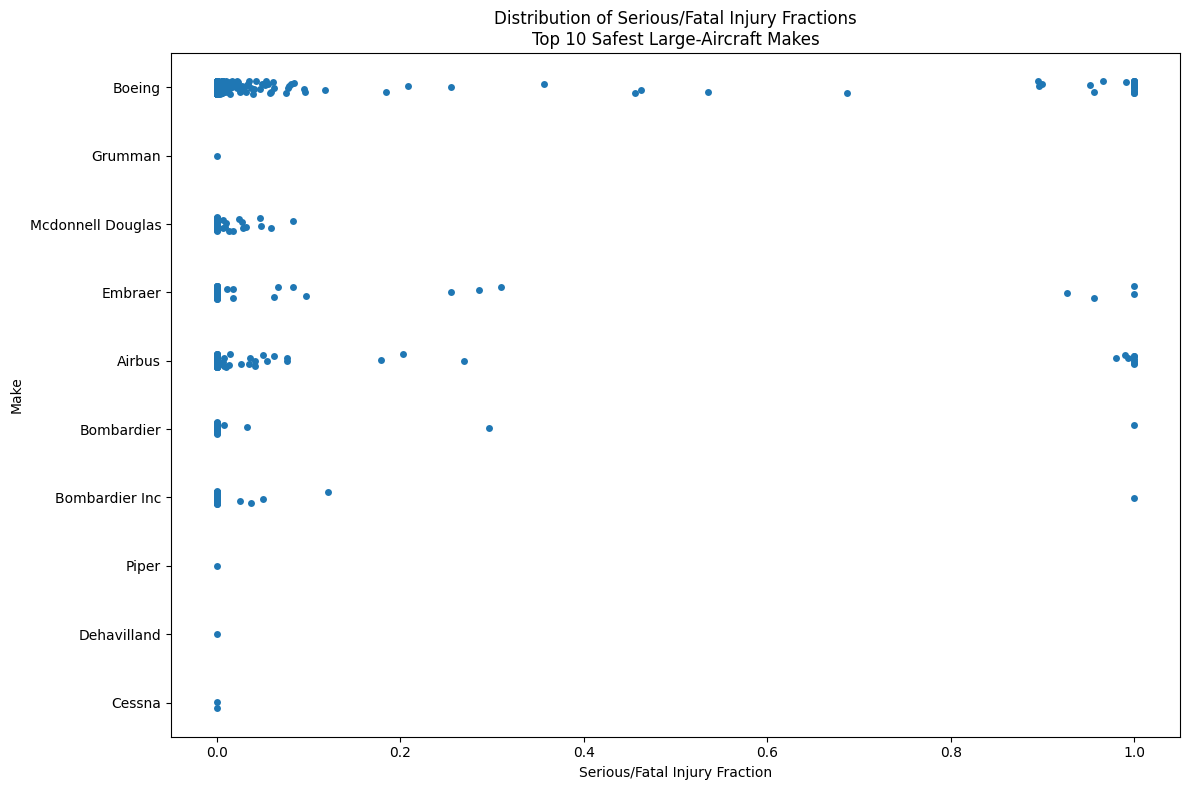

In [24]:
#filter large airplanes - greater than 20 passengers
large_planes = df[df['Total_Passengers'] > 20]

#find 10 makes with the lowest mean serious/fatal injury fraction
large_make_means = (large_planes.groupby('Make_Clean')['Serious_Fatal_Fraction'].mean().sort_values())

top10_large_makes = large_make_means.head(10).index

#filter to just these makes
large_subset = large_planes[large_planes['Make_Clean'].isin(top10_large_makes)]

#plot stripplot
plt.figure(figsize=(12, 8))

sns.stripplot(data=large_subset,x='Serious_Fatal_Fraction',y='Make_Clean',jitter=True)

plt.title("Distribution of Serious/Fatal Injury Fractions\nTop 10 Safest Large-Aircraft Makes")
plt.xlabel("Serious/Fatal Injury Fraction")
plt.ylabel("Make")
plt.tight_layout()
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [25]:
#destruction rate for SMALL aircraft
small_destruction = (
    small_planes.groupby('Make_Clean')['Destroyed']
    .mean()
    .sort_values()
    .reset_index(name='Destruction_Rate')
)

#destruction rate for LARGE aircraft
large_destruction = (
    large_planes.groupby('Make_Clean')['Destroyed']
    .mean()
    .sort_values()
    .reset_index(name='Destruction_Rate')
)

#keep the lowest 15 (safest)
small_low15 = small_destruction.head(15)
large_low15 = large_destruction.head(15)

#display results
print("Small Aircraft – Lowest 15 Makes by Destruction Rate:")
print(small_low15)

print("\nLarge Aircraft – Lowest 15 Makes by Destruction Rate:")
print(large_low15)

Small Aircraft – Lowest 15 Makes by Destruction Rate:
                        Make_Clean  Destruction_Rate
0                         Luscombe          0.014184
1   Grumman Acft Eng Cor-Schweizer          0.017241
2                          Stinson          0.023256
3                           Airbus          0.024000
4                      Taylorcraft          0.032258
5                       Bombardier          0.034483
6                          Aeronca          0.035000
7                           Boeing          0.036415
8       American Champion Aircraft          0.038462
9                          Ercoupe          0.038462
10              Aviat Aircraft Inc          0.039474
11                           Maule          0.041860
12                     Dehavilland          0.042553
13                  Bombardier Inc          0.045455
14                        Bellanca          0.050228

Large Aircraft – Lowest 15 Makes by Destruction Rate:
           Make_Clean  Destruction_Rate
0  

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

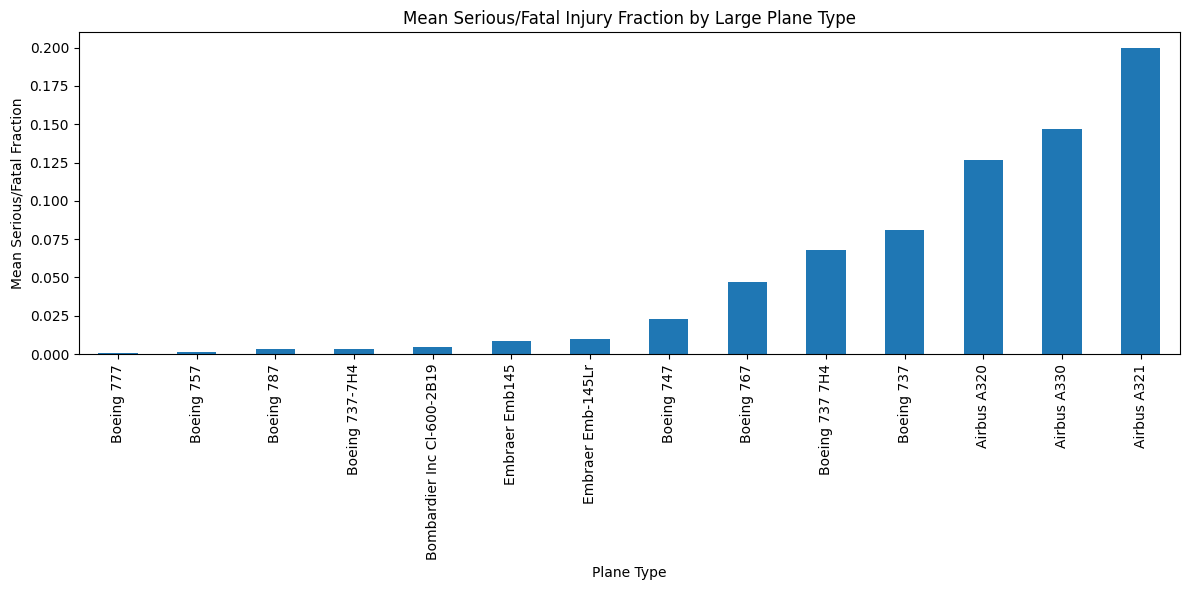

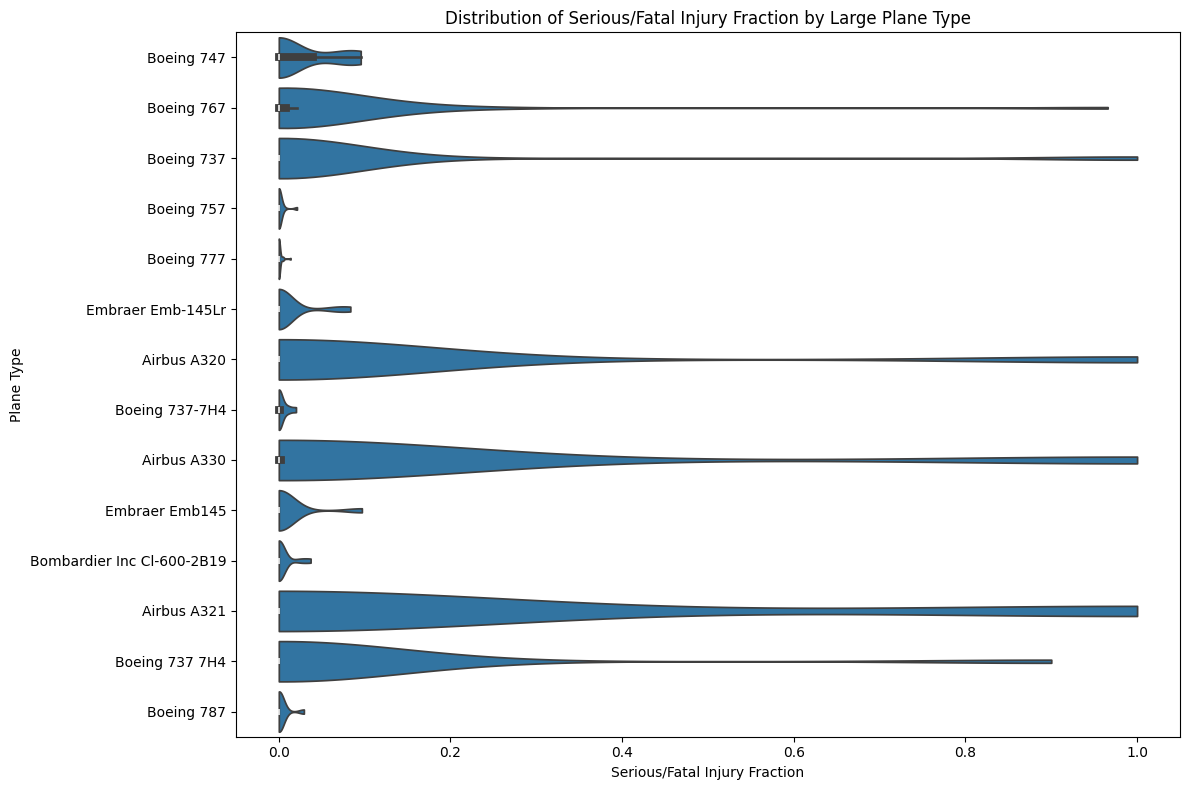

In [27]:
#filter large planes with more than 20 passengers
large_planes = df[df['Total_Passengers'] > 20]

#keep only plane types with at least 10 accidents
plane_counts = large_planes['Plane_Type'].value_counts()
large_planes_filtered = large_planes[large_planes['Plane_Type'].isin(plane_counts[plane_counts >= 10].index)]

#computing mean Serious/Fatal fraction per plane type
mean_injury_fraction = large_planes_filtered.groupby('Plane_Type')['Serious_Fatal_Fraction'].mean().sort_values()

#plotting mean Serious/Fatal fraction per plane type
plt.figure(figsize=(12, 6))
mean_injury_fraction.plot(kind='bar')
plt.title("Mean Serious/Fatal Injury Fraction by Large Plane Type")
plt.ylabel("Mean Serious/Fatal Fraction")
plt.xlabel("Plane Type")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#distribution plot (violin) for serious/fatal injury fraction
plt.figure(figsize=(12, 8))
sns.violinplot(data=large_planes_filtered, x='Serious_Fatal_Fraction', y='Plane_Type', density_norm='width', cut=0)
plt.title("Distribution of Serious/Fatal Injury Fraction by Large Plane Type")
plt.xlabel("Serious/Fatal Injury Fraction")
plt.ylabel("Plane Type")
plt.tight_layout()
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

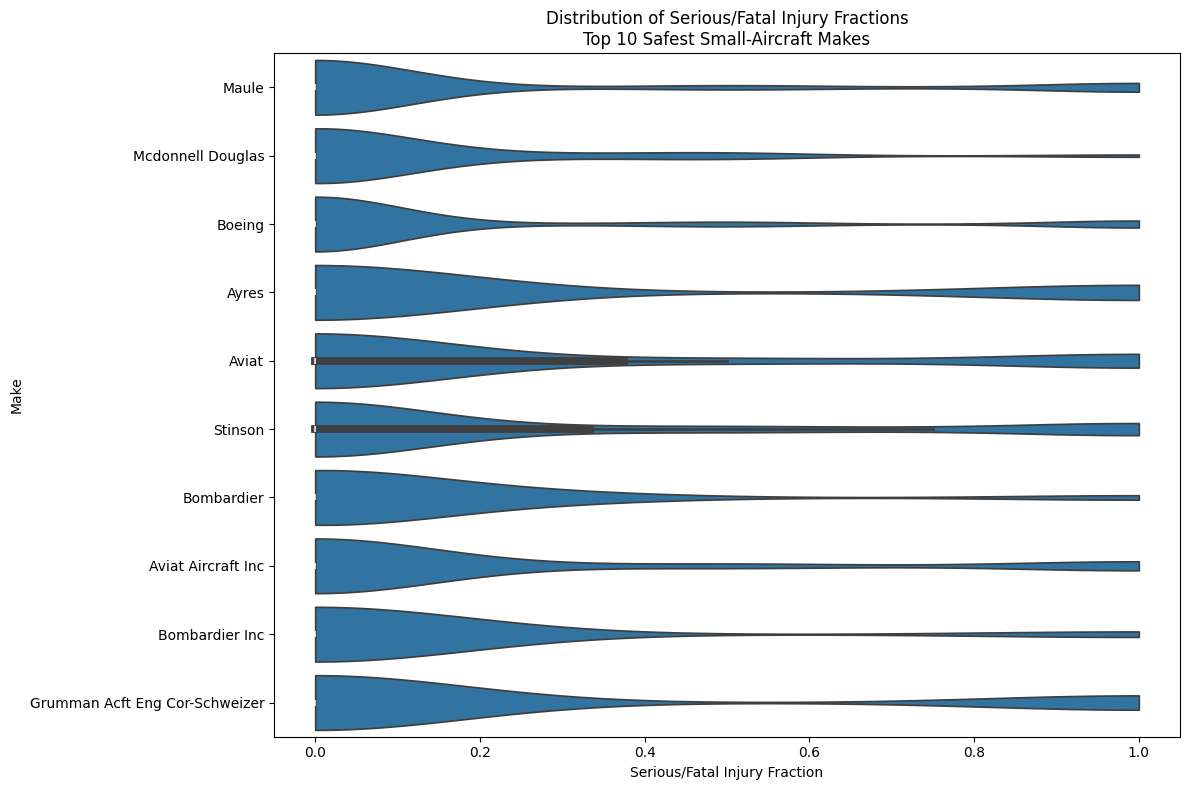

In [30]:
#calculate mean serious/fatal injury fraction per Make
small_make_means = small_planes.groupby('Make_Clean')['Serious_Fatal_Fraction'].mean().sort_values()

#take the 10 safest makes (lowest mean injury fraction)
top10_small_makes = small_make_means.head(10).index

#filter small_planes to only include those makes
small_subset = small_planes[small_planes['Make_Clean'].isin(top10_small_makes)]

#violin plot for the injury fraction distribution
plt.figure(figsize=(12, 8))
sns.violinplot(data=small_subset,x='Serious_Fatal_Fraction',y='Make_Clean',density_norm='width',cut=0)

plt.title("Distribution of Serious/Fatal Injury Fractions\nTop 10 Safest Small-Aircraft Makes")
plt.xlabel("Serious/Fatal Injury Fraction")
plt.ylabel("Make")
plt.tight_layout()
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

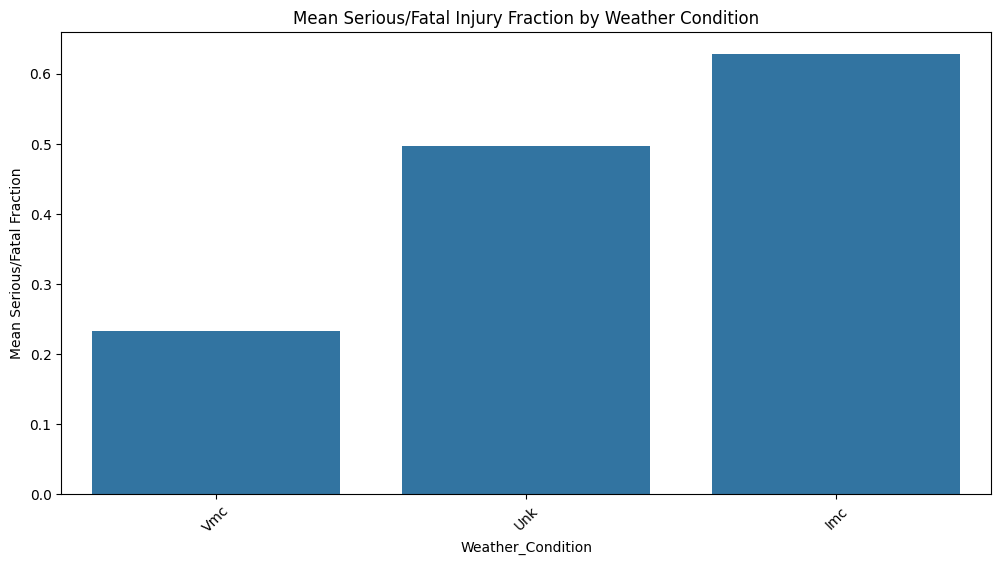

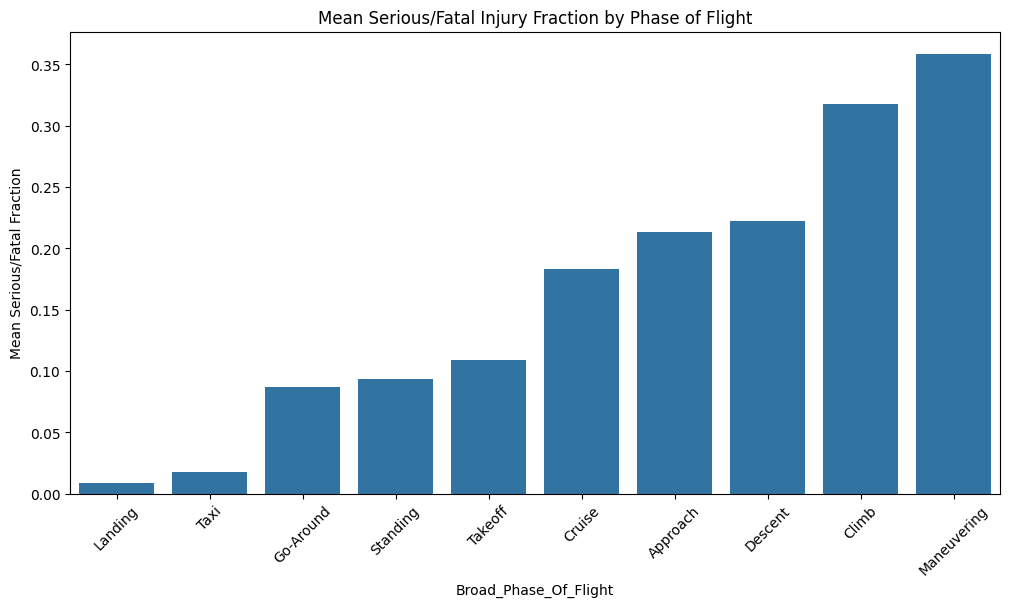

In [33]:
#weather condition
#grouped by weather condition and get mean destroyed fraction and serious/fatal fraction
weather_summary = df.groupby('Weather_Condition').agg(mean_destroyed=('Destroyed', 'mean'),
                mean_serious_fatal=('Serious_Fatal_Fraction', 'mean'),count=('Plane_Type', 'count')
                ).sort_values('mean_serious_fatal')

#only including conditions with at least 20 observations
weather_summary = weather_summary[weather_summary['count'] >= 20]

#plotting
plt.figure(figsize=(12,6))
sns.barplot(x=weather_summary.index, y=weather_summary['mean_serious_fatal'])
plt.xticks(rotation=45)
plt.ylabel("Mean Serious/Fatal Fraction")
plt.title("Mean Serious/Fatal Injury Fraction by Weather Condition")
plt.show()

#phase of flight
#grouped by phase of flight and get mean destroyed fraction and serious/fatal fraction
phase_summary = df.groupby('Broad_Phase_Of_Flight').agg(mean_destroyed=('Destroyed', 'mean'),
            mean_serious_fatal=('Serious_Fatal_Fraction', 'mean'),count=('Plane_Type', 'count')
            ).sort_values('mean_serious_fatal')

#only include phases with at least 20 observations
phase_summary = phase_summary[phase_summary['count'] >= 20]

#plotting
plt.figure(figsize=(12,6))
sns.barplot(x=phase_summary.index, y=phase_summary['mean_serious_fatal'])
plt.xticks(rotation=45)
plt.ylabel("Mean Serious/Fatal Fraction")
plt.title("Mean Serious/Fatal Injury Fraction by Phase of Flight")
plt.show()